In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import sklearn.metrics as sm
import math
import tensorflow as tf
#import cv2
import glob
import os
import time, threading
import json

In [2]:
dataset =pd.read_csv('csv0.csv') 

X = dataset.iloc[:,[16,17]].values
X

array([[123.5, 296.5],
       [ 30.5, 165.5],
       [138. , 147. ],
       [ 74.5, 136.5],
       [ 49. , 114. ],
       [ 32.5, 109.5],
       [333. , 201. ],
       [410.5, 129.5],
       [180. , 185. ],
       [296.5, 149.5],
       [269. , 112. ],
       [292. ,  97. ],
       [311. , 107. ],
       [306.5, 126.5],
       [ 80. ,  85. ],
       [383. ,  61. ],
       [464. , 124. ],
       [452.5,  42.5],
       [421.5,  30.5],
       [392.5,  34.5],
       [370. ,  32. ],
       [243. , 104. ],
       [198. , 109. ],
       [111.5,  91.5],
       [337.5,  34.5],
       [311.5,  34.5],
       [275.5,  35.5],
       [249. ,  34. ],
       [230.5,  39.5],
       [195. ,  37. ],
       [179. ,  36. ],
       [258. ,  90. ],
       [313.5,  77.5],
       [143.5,  81.5],
       [ 53.5,  81.5],
       [ 95.5, 120.5],
       [219.5, 152.5],
       [233. , 125. ]])

In [3]:
def calc_distance(x1, y1, a, b, c):
    
    d = abs((a * x1 + b * y1 + c)) / (math.sqrt(a * a + b * b))
    
    return d

In [4]:
wcss = []

for i in range(1, 11):
   
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
   
  kmeans.fit(X)
   
  wcss.append(kmeans.inertia_)

In [5]:
K=range(1,11)
 
x = [K[0], K[9]]

y = [wcss[0], wcss[9]]

In [6]:
a = wcss[0] - wcss[9]

b = K[9] - K[0]

c1 = K[0] * wcss[9]

c2 = K[9] * wcss[0]

c = c1 - c2

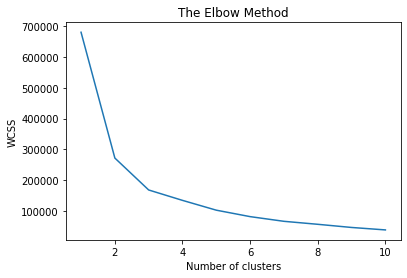

In [7]:
plt.plot(range(1, 11), wcss)

plt.title('The Elbow Method')

plt.xlabel('Number of clusters')

plt.ylabel('WCSS')

plt.show()

In [8]:
distance_of_points_from_line = []



for k in range(10):
    
    distance_of_points_from_line.append(calc_distance(K[k], wcss[k], a, b, c))   

In [9]:
optimal_number_of_cluster=1+distance_of_points_from_line.index(max(distance_of_points_from_line))

In [10]:
kmeans = KMeans(n_clusters = optimal_number_of_cluster, init = 'k-means++', random_state = 42)

y_kmeans = kmeans.fit_predict(X)
    

In [11]:
cluster_centroids_list=[[None for _ in range(2)] for _ in range(optimal_number_of_cluster)]

In [12]:
for j in range(0,optimal_number_of_cluster):
    
     cluster_centroids_list[j][0]=round(kmeans.cluster_centers_[j][0])
    
     cluster_centroids_list[j][1]=round(kmeans.cluster_centers_[j][1])


        
print(cluster_centroids_list)


[[262.0, 93.0], [93.0, 134.0], [404.0, 61.0]]


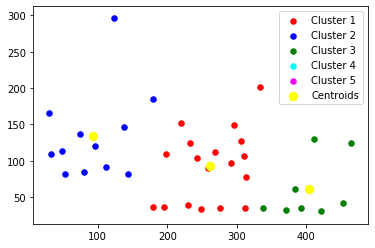

In [13]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 30, c = 'red', label = 'Cluster 1')

plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 30, c = 'blue', label = 'Cluster 2')

plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 30, c = 'green', label = 'Cluster 3')

plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 30, c = 'cyan', label = 'Cluster 4')

plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 30, c = 'magenta', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 70, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()

In [14]:
def k_mean_distance(data, cx, cy, i_centroid, cluster_labels):
    distances=[np.sqrt((x-cx)**2+(y-cy)**2) for (x,y) in data[cluster_labels == i_centroid]]
    return np.mean(distances)


In [15]:
clusters=kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_
labels=kmeans.labels_

In [16]:
clusters=kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_
labels=kmeans.labels_
total_distance=[]
for i, (cx,cy) in enumerate(centroids):
    mean_distance=k_mean_distance(X,cx,cy,i, clusters)
    total_distance.append(mean_distance)

total_distance


[58.995744616135035, 63.80117965454809, 51.134662995000994]